In [62]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir) + "/src/"
sys.path.insert(0, parentdir) 

from modeling import filter_depth, filter_rank, filter_value, value_path, value_EV, value_max, value_sum, value_levelmean
from modelchecking import trialwise_rewards, trialwise_greedydiff, trialwise_chooseleft
from analysis import Analyzer, lmm, glmm
from plots import set_helvetica_style
from utils import colormaps, report_p_value, strsimplify, get_conditions, alphabet, format_games
from modeling import preprocess_data, make_pov_array
import json

%load_ext autoreload
%autoreload 2

def get_colormap(type_):
    return {"R": colormaps["arctic"], "T": colormaps["berry"], "V": colormaps["grass"]}[type_]

def get_filter_and_value_functions(type_):
    # which filter functions to compare to
    compare_filter_fns = [
        ["depth", filter_depth],
        ["rank", filter_rank],
        ["value", filter_value]]

    compare_value_fns = [
        ["path", value_path], 
        ["max", value_max],
        ["sum", value_sum], 
        ["level-mean", value_levelmean]]

    if type_ == "R" or type_ == "T": 
        compare_value_fns.append(["EV", value_EV])
    return compare_filter_fns, compare_value_fns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
type_ = "V"
analyzer = Analyzer(f"main.filter_depth.value_path",
                            *get_filter_and_value_functions(type_),
                            type_, colors=get_colormap(type_), folders=["main"])

folder: main
	[nParams] Found 7 params: ['0.0', '0.25', '0.5', '0.75', '1.0', 'inv_temp', 'lapse']


N bootstrap 1000000.0


100%|██████████| 12/12 [00:07<00:00,  1.55it/s]


(-10.0, 10.0)

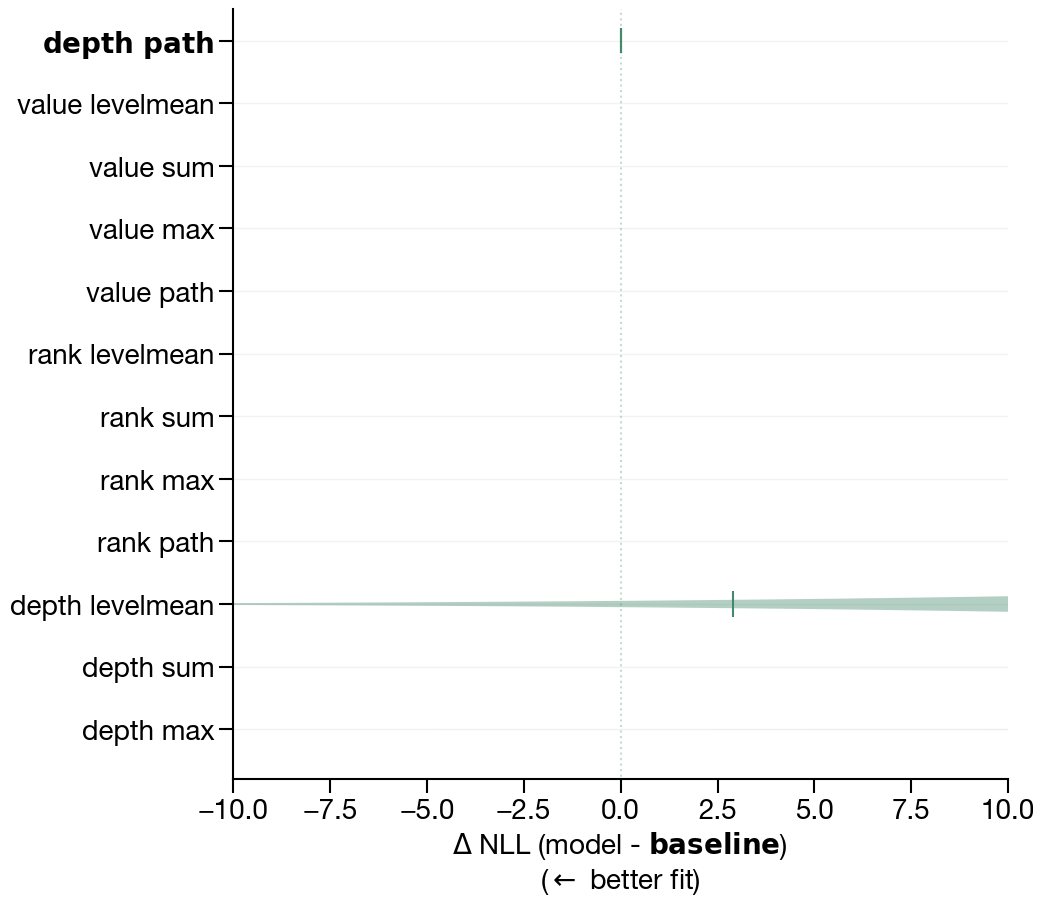

In [70]:
fig, ax = plt.subplots(figsize = (10, 10))
out = analyzer.plot_model_comparison(format = "violin", ax = ax)
ax.set_xlim(-10, 10)


In [ ]:
import polars as pl
from pymer4.models import lmer, glmer
df = pl.from_pandas(df_)
error_log = []
for formula, label in [
    ("y ~ conditions + (1|participants)", "Intercept-only"), 
    ("y ~ conditions + 1", "Full"), 
    ]:
    model = lmer(formula, data = df)

In [55]:
from pymer4.models import lm

In [58]:
model = lm("y ~ conditions + 1", df)
model.fit()

In [59]:
model.summary()

GT(_tbl_data=shape: (2, 9)
┌─────────────┬──────────┬───────────┬───────────┬───┬───────────┬─────┬─────────┬───────┐
│ term        ┆ estimate ┆ std_error ┆ conf_low  ┆ … ┆ t_stat    ┆ df  ┆ p_value ┆ stars │
│ ---         ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---       ┆ --- ┆ ---     ┆ ---   │
│ str         ┆ f64      ┆ f64       ┆ f64       ┆   ┆ f64       ┆ i64 ┆ str     ┆ str   │
╞═════════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═════╪═════════╪═══════╡
│ (Intercept) ┆ 1.19     ┆ 0.069851  ┆ 1.05276   ┆ … ┆ 17.036167 ┆ 498 ┆ <.001   ┆ ***   │
│ conditions  ┆ -0.66    ┆ 0.114067  ┆ -0.884112 ┆ … ┆ -5.786081 ┆ 498 ┆ <.001   ┆ ***   │
└─────────────┴──────────┴───────────┴───────────┴───┴───────────┴─────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x10e67ed70>, _boxhead=Boxhead([ColInfo(var='term', type=<ColInfoTypeEnum.stub: 2>, column_label='term', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='df', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x10eafdd10>, _spanners=Spanners([]), _heading=Heading(title='Formula: lm(y~conditions+1)', subtitle=Md(text='Number of observations: *500*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            R-squared: *0.063*  \n            R-squared-adj: *0.0611*  \n            *F(1, 498) = 33.479, p = <.001*  \n            Log-likelihood: *-656*  \n            AIC: *1319* | BIC: *1332*  \n            Residual error: *0.902*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocStub(rows=None), grpname=None, colname=None, rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)])], _locale=<great_tables._gt_data.Locale object at 0x10ec74190>, _formats=[<great_tables._gt_data.FormatInfo object at 0x38bec3d90>, <great_tables._gt_data.FormatInfo object at 0x10e67e8b0>], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', valu

In [52]:
model.fit()

R messages: 
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.

R messages: 
boundary (singular) fit: see help('isSingular')

Random effect variances not available. Returned R2 does not account for random effects.



In [53]:
model.summary()

GT(_tbl_data=shape: (6, 10)
┌─────────────────┬─────────────┬──────────┬───────────┬───┬───────────┬───────┬─────────┬───────┐
│ rfx             ┆ param       ┆ estimate ┆ std_error ┆ … ┆ t_stat    ┆ df    ┆ p_value ┆ stars │
│ ---             ┆ ---         ┆ ---      ┆ ---       ┆   ┆ ---       ┆ ---   ┆ ---     ┆ ---   │
│ str             ┆ str         ┆ f64      ┆ f64       ┆   ┆ f64       ┆ f64   ┆ str     ┆ str   │
╞═════════════════╪═════════════╪══════════╪═══════════╪═══╪═══════════╪═══════╪═════════╪═══════╡
│ participants-sd ┆ (Intercept) ┆ 0.0      ┆ null      ┆ … ┆ null      ┆ null  ┆ null    ┆ null  │
│ Residual-sd     ┆ Observation ┆ 0.901778 ┆ null      ┆ … ┆ null      ┆ null  ┆ null    ┆ null  │
│ null            ┆ null        ┆ null     ┆ null      ┆ … ┆ null      ┆ null  ┆ null    ┆ null  │
│ Fixed Effects:  ┆ null        ┆ null     ┆ null      ┆ … ┆ null      ┆ null  ┆ null    ┆ null  │
│ null            ┆ (Intercept) ┆ 1.19     ┆ 0.069851  ┆ … ┆ 17.036167 ┆ 498.0 ┆ <.001   ┆ ***   │
│ null            ┆ conditions  ┆ -0.66    ┆ 0.114067  ┆ … ┆ -5.786081 ┆ 498.0 ┆ <.001   ┆ ***   │
└─────────────────┴─────────────┴──────────┴───────────┴───┴───────────┴───────┴─────────┴───────┘, _body=<great_tables._gt_data.Body object at 0x35d360590>, _boxhead=Boxhead([ColInfo(var='rfx', type=<ColInfoTypeEnum.default: 1>, column_label='Random Effects:', column_align='left', column_width=None), ColInfo(var='param', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None), ColInfo(var='estimate', type=<ColInfoTypeEnum.default: 1>, column_label='Estimate', column_align='right', column_width=None), ColInfo(var='std_error', type=<ColInfoTypeEnum.default: 1>, column_label='SE', column_align='right', column_width=None), ColInfo(var='conf_low', type=<ColInfoTypeEnum.default: 1>, column_label='CI-low', column_align='right', column_width=None), ColInfo(var='conf_high', type=<ColInfoTypeEnum.default: 1>, column_label='CI-high', column_align='right', column_width=None), ColInfo(var='t_stat', type=<ColInfoTypeEnum.default: 1>, column_label='T-stat', column_align='right', column_width=None), ColInfo(var='df', type=<ColInfoTypeEnum.default: 1>, column_label='DF', column_align='right', column_width=None), ColInfo(var='p_value', type=<ColInfoTypeEnum.default: 1>, column_label='p', column_align='left', column_width=None), ColInfo(var='stars', type=<ColInfoTypeEnum.default: 1>, column_label='', column_align='left', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x35d360c20>, _spanners=Spanners([]), _heading=Heading(title='Formula: lmer(y~conditions+(1|participants))', subtitle=Md(text='Number of observations: *500*  \n            Confidence intervals: *parametric*  \n            ---------------------  \n            Log-likelihood: *-660*  \n            AIC: *1328* | BIC: *1345*  \n            Residual error: *0.902*  \n        '), preheader=None), _stubhead=None, _source_notes=[Md(text='Signif. codes: *0 *** 0.001 ** 0.01 * 0.05 . 0.1*')], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns=['param'], rows=None), grpname=None, colname='param', rownum=0, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None), grpname=None, colname='param', rownum=1, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None), grpname=None, colname='param', rownum=2, colnum=None, styles=[CellStyleText(color=None, font=None, size=None, align=None, v_align=None, style='italic', weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns=['param'], rows=None), grpname=None, colname='par

In [30]:
from modelchecking import load_fit, fit_to_dataframe
folder = "conditional_lapse_alternative"
variant = "R"
filter_fn = filter_depth
value_fn = value_path

fit = load_fit(variant, filter_fn, value_fn, folder = folder)

../data/conditional_lapse_alternative/R_value_path.filter_depth


In [29]:
df = fit_to_dataframe(fit)